In [1]:
# YOLO インストール
!pip install -Uq ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 18.6 MB/s eta 0:00:00


In [2]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/object_detector/cat_and_dog.jpg

In [3]:
from PIL import Image

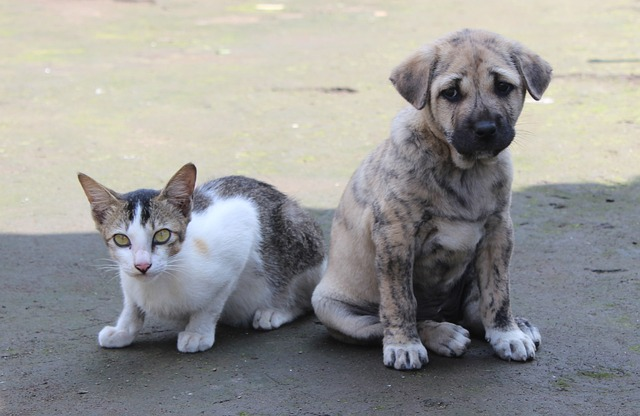

In [4]:
# DLした画像を確認
img_file = "image.jpg"
pil_image = Image.open(img_file)
pil_image

In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO("yolo11s.pt") # 事前学習モデル n < s < m < l < x

100%|██████████| 18.4M/18.4M [00:00<00:00, 197MB/s]



0: 416x640 1 cat, 1 dog, 625.2ms
Speed: 32.8ms preprocess, 625.2ms inference, 37.7ms postprocess per image at shape (1, 3, 416, 640)


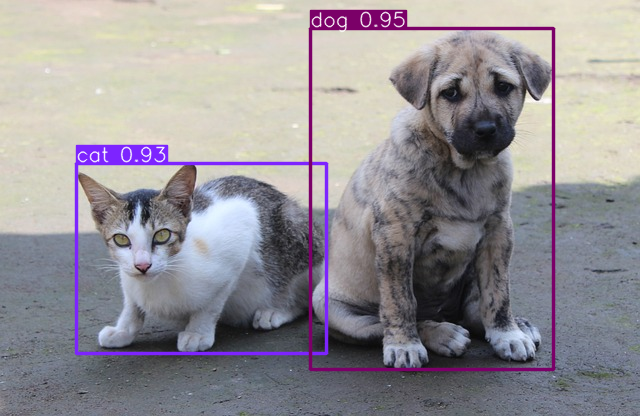

In [7]:
# 物体検出
results = model(pil_image)
results[0].show()

In [18]:
# !wget -q -O image.jpg https://www.nonhoi.jp/blog/wp-content/uploads/2021/10/de21f9a5e8796b2df4170dad1cb9abea.jpg
!wget -q -O image.jpg https://www.tennojizoo.jp/wp-content/uploads/2021/04/kirin161128.jpg


0: 384x640 2 zebras, 2 giraffes, 339.5ms
Speed: 2.5ms preprocess, 339.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


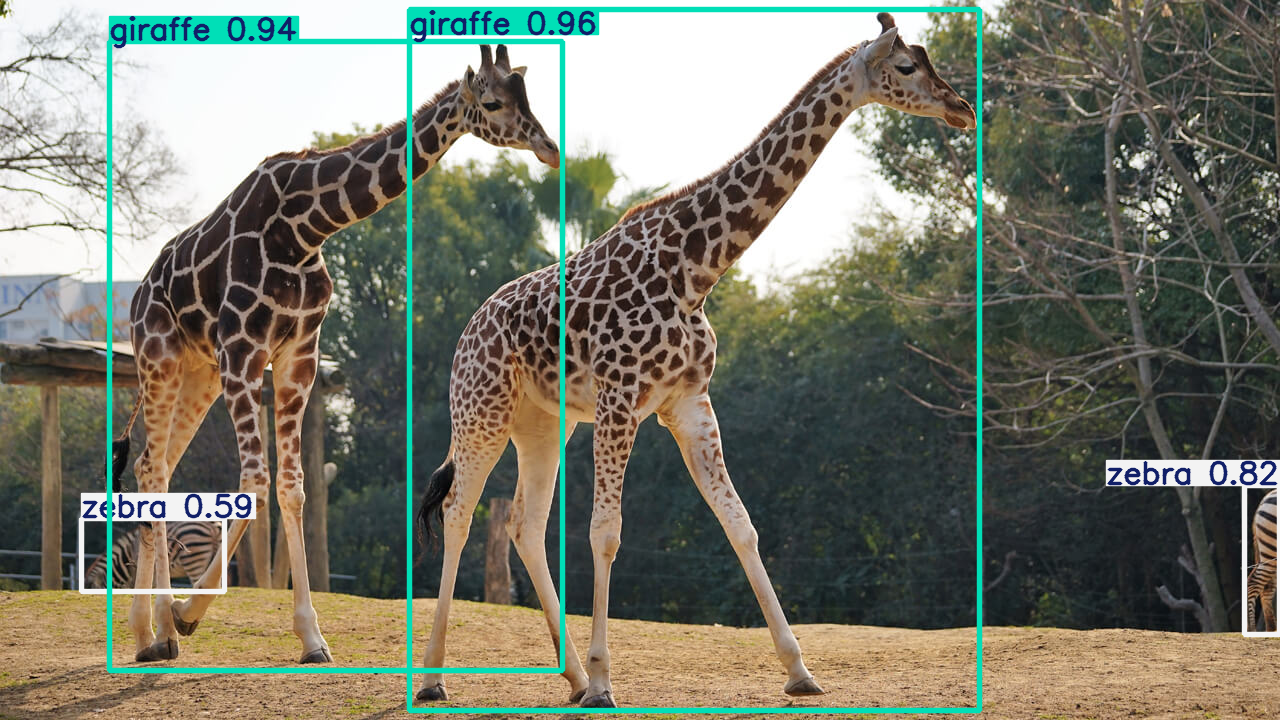

In [44]:
# まとめると
pil_image = Image.open("image.jpg")
model = YOLO("yolo11s.pt") # 事前学習モデル n < s < m < l < x
# 物体検出
results = model(pil_image)
results[0].show()

In [9]:
# クラス名一覧
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [16]:
# 結果の保存
results[0].save("result0.jpg")

'result0.jpg'

In [24]:
# 検出結果：バウンディングボックスの情報
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([23., 23., 22., 22.])
conf: tensor([0.9629, 0.9379, 0.8160, 0.5861])
data: tensor([[4.0977e+02, 9.6740e+00, 9.7997e+02, 7.1083e+02, 9.6285e-01, 2.3000e+01],
        [1.0937e+02, 4.1682e+01, 5.6262e+02, 6.7055e+02, 9.3793e-01, 2.3000e+01],
        [1.2447e+03, 4.8597e+02, 1.2797e+03, 6.3461e+02, 8.1602e-01, 2.2000e+01],
        [8.1887e+01, 5.1811e+02, 2.2401e+02, 5.9101e+02, 5.8615e-01, 2.2000e+01]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[ 694.8713,  360.2539,  570.2043,  701.1599],
        [ 335.9962,  356.1143,  453.2573,  628.8640],
        [1262.2035,  560.2912,   34.9709,  148.6371],
        [ 152.9478,  554.5625,  142.1222,   72.8982]])
xywhn: tensor([[0.5429, 0.5004, 0.4455, 0.9738],
        [0.2625, 0.4946, 0.3541, 0.8734],
        [0.9861, 0.7782, 0.0273, 0.2064],
        [0.1195, 0.7702, 0.1110, 0.1012]])
xyxy: tensor([[ 409.7692,    9.6740,  979.9735,  710

In [28]:
from PIL import Image, ImageDraw, ImageFont # Python Image Library

In [45]:
draw = ImageDraw.Draw(pil_image)
font_path = "/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf" # フォントのパス
# 日本語フォントをダウンロードしてきても良い
font = ImageFont.truetype(font_path, 24) # フォントとフォントサイズの指定

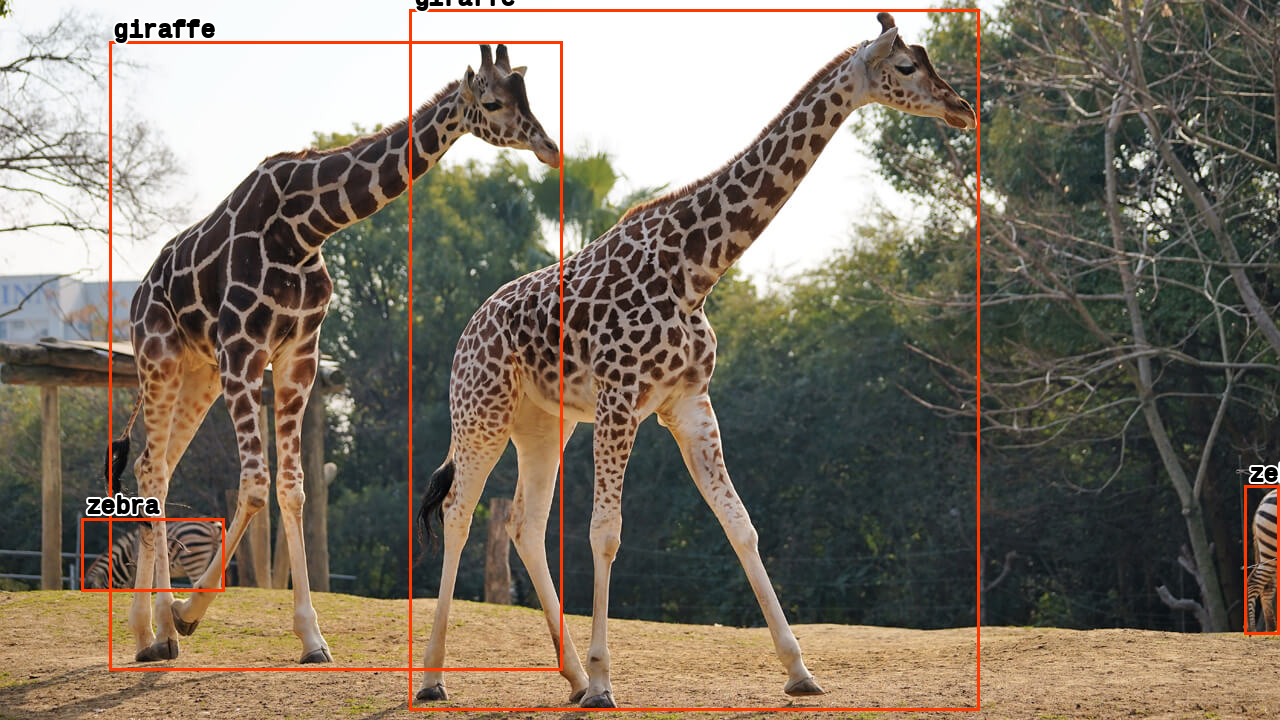

In [46]:
class_names = results[0].names
for box in results[0].boxes:
    xyxy = (box.xyxy[0][0], box.xyxy[0][1], box.xyxy[0][2], box.xyxy[0][3])
    draw.rectangle(xyxy, outline=(255, 55, 0), width=3)
    font_xy = (box.xyxy[0][0] + 5, box.xyxy[0][1] - 25)
    cls_name = class_names[int(box.cls)] # クラス名
    draw.text(xy=font_xy, text=cls_name, fill="white", font=font, stroke_width=3)
    draw.text(xy=font_xy, text=cls_name, fill="black", font=font, stroke_width=1)
pil_image